<a href="https://colab.research.google.com/github/richruizv/Donuts/blob/main/random_walking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Random walking
---
In this exercise we will see how to simulate a random walking







## 1. Simulate the bet
Firt we are going to make the function that simulates the bet of a gambler




In [363]:
#Importing libraries
import numpy as np
import random as rd

def flip_coin(prob): #1: head #0 tails
  return 1 if rd.random() < prob else 0


#creating the function with a default probability, params: money of the gambler of probability of success
def gamble_on_coin(money=20,prob=0.5):
  
  # The list that we save the results of each 
  list_money = [money]


  while money < 30 and money > 0:
    coin_flipped =  flip_coin(prob)
    if coin_flipped == 1: #if head, gambler wins, otherwise he losses
      money += 1
    elif coin_flipped == 0:
      money -= 1
    list_money.append(money)
    
  if money == 30: 
    win = True
  else:
    win = False
  return list_money,win

print(gamble_on_coin())


([20, 19, 18, 19, 20, 19, 20, 21, 22, 21, 20, 19, 20, 21, 22, 21, 22, 23, 24, 25, 24, 25, 26, 25, 26, 25, 24, 25, 24, 25, 26, 25, 24, 25, 24, 23, 22, 21, 22, 21, 20, 19, 18, 19, 18, 17, 16, 17, 18, 17, 16, 15, 16, 15, 14, 13, 12, 13, 12, 11, 10, 9, 8, 9, 8, 9, 10, 11, 10, 9, 10, 11, 10, 9, 10, 11, 10, 11, 10, 11, 10, 9, 10, 11, 10, 11, 10, 9, 8, 7, 6, 7, 6, 5, 6, 5, 6, 5, 4, 5, 6, 7, 6, 7, 6, 5, 4, 5, 4, 3, 2, 1, 0], False)


## 2. Graph the result
Once created the function we use Matplotlib to graph the result of a set of trials

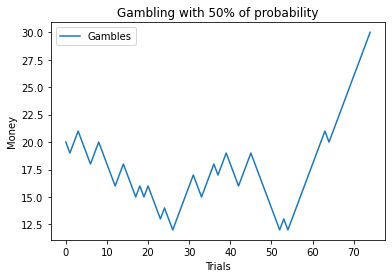

In [364]:
import matplotlib.pyplot as plt


#gambling with 25% of probability of wining
gambles , result = gamble_on_coin(prob = 0.5)

x = [i for i in range(len(gambles))]
y = gambles

plt.xlabel("Trials")
plt.ylabel("Money")
plt.title("Gambling with 50% of probability")
plt.plot(x,y,label = 'Gambles')
plt.legend()
plt.show()

## 3. Repeating the experiment multiple times
We simulate this experiment multiple times, manipulate the coin toss's probability, and compare the results.

We can observe that even a slightly variation of probability leads to more posibilities of loss

In [370]:
import statistics as st

# function to simulate a determined number of times the gamble
def simulate_gamble(money= 20,size_experiment = 1000, prob=0.5):
  success = fail = 0
  media_success = media_fail = 0
  list_success = []
  list_fail = []
  
  for i in range(size_experiment):
    gambles , result = gamble_on_coin(money, prob)
    if (result == True):
      success += 1
      list_success.append(len(gambles))
    else:
      fail +=1
      list_fail.append(len(gambles))
  
  
  media_success = round(st.mean(list_success) if len(list_success)> 0 else 0,2)
  media_fail = round(st.mean(list_fail) if len(list_fail) > 0 else 0,2)
  
  return success,media_success,fail,media_fail

size_experiment = 10000

prob1 = simulate_gamble(money,size_experiment,prob = 0.51)
prob2 = simulate_gamble(money,size_experiment,prob=0.5)
prob3 = simulate_gamble(money,size_experiment,prob=0.49)

print(f"Number of times that got broken with 49% probability of loss: {prob1[2]} out of {size_experiment}: {prob1[2]/size_experiment*100}%")
print(f"Number of times that got broken with 50% probability of loss: {prob2[2]} out of {size_experiment}: {prob2[2]/size_experiment*100}%")
print(f"Number of times that got broken with 51% probability of loss: {prob3[2]} out of {size_experiment}: {prob3[2]/size_experiment*100}%")


  



Number of times that got broken with 49% probability of loss: 2092 out of 10000: 20.919999999999998%
Number of times that got broken with 50% probability of loss: 3362 out of 10000: 33.62%
Number of times that got broken with 51% probability of loss: 4756 out of 10000: 47.56%
